In [42]:
import numpy as np
import matplotlib.pyplot as plt
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

In [43]:
# Define the polynomial model of degree 3, i.e., having 3 weights and 1 bias. 
# Also define the loss function
def polynomial_model(x, weights, bias):
    return weights[0] * x**3 + weights[1] * x**2 + weights[2] * x + bias

def loss(y_predict, y_true):
    return np.mean((y_predict - y_true)**2)

In [44]:
# Define gradient manually wrt the exisiting parameters
# Note: You need to define appropriate derivative functions to define the gradient
# Use the defined gradient function to define the training function 
# Note: You cannot use autograd and optimizers
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve
def gradient(x, y, weights, bias):
    n = len(x)
    grad_weights = np.zeros(3)
    grad_bias = 0.0

    for i in range(n):
        pred = polynomial_model(x[i], weights, bias)
        grad_weights[0] += 2 * (pred - y[i]) * x[i]**3
        grad_weights[1] += 2 * (pred - y[i]) * x[i]**2
        grad_weights[2] += 2 * (pred - y[i]) * x[i]
        grad_weights += 2 * (pred - y[i])

    grad_weights /= n
    grad_bias /= n

    return grad_weights, grad_bias

In [45]:
# Use PyTorch's autograd to automatically compute the gradients 
# Define the training function
# Note: You cannot use optimizers.
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve
def train(x, y, learning_rate, iterations):
    weights = np.random.randn(3)
    bias = np.random.randn()

    losses = []
    for _ in range(iterations):
        y_pred = polynomial_model(x, weights, bias)
        loss_val = loss(y_pred, y)
        losses.append(loss)

        grad_weights, grad_bias = gradient(x, y, weights, bias)
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

    return weights, bias, losses

In [63]:
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve
inp = np.array([ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900])
out = np.array([ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1])


learning_rate = 0.00001
iterations = 100000
final_weights, final_bias, losses = train(inp, out, learning_rate, iterations)

<function matplotlib.pyplot.show(close=None, block=None)>

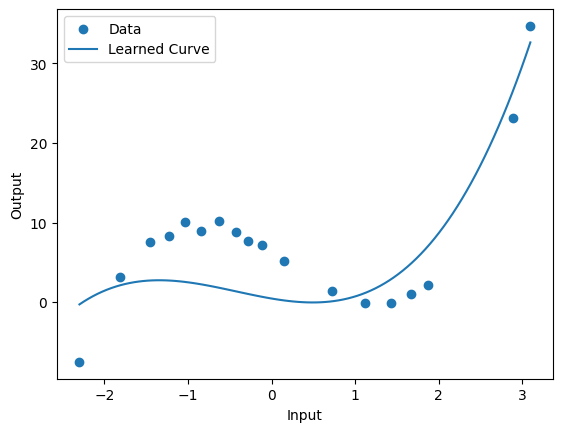

In [64]:
# Split the dataset to training set (80%) and validation set (20%) randomly
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function that tracks both training and validation losses
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve
x_range = np.linspace(min(inp), max(inp), 100)
y_pred = polynomial_model(x_range, final_weights, final_bias)
plt.scatter(inp, out, label='Data')
plt.plot(x_range, y_pred, label='Learned Curve')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show